# 1. Качественная результирующая переменная, количественный фактор. Количественная результирующая переменная, качественный фактор


## 1.1 t-тест Стьюдента

### 1.1.1 Two-Sample T-Test (независимый, двухвыборочный t-тест Стьюдента)

In [1]:
# импорт библиотек
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [2]:
df4 = pd.read_excel('scoring_new.xlsx')
df4

,Возраст,Иждивенцы,Доход (тыс. руб.),Опыт работы,Срок проживания,Стоимость недвижимости в собственности (тыс.дол.),Месячный платеж (тыс.руб.),Благонадежный заемщик
0,28,0,18.0,9.0,7,0,3.946,0
1,39,1,27.0,17.0,6,0,2.460,1
2,31,2,14.0,11.0,3,0,3.126,0
3,34,1,20.4,15.0,2,41,3.280,1
4,46,2,17.0,20.0,8,0,3.348,1
...,...,...,...,...,...,...,...,...
994,35,2,62.0,17.0,6,0,4.715,1
995,37,1,7.2,8.0,15,0,2.409,0
996,40,0,17.0,8.5,6,42,2.460,1
997,39,0,35.0,21.0,6,0,3.331,1


Разделяем выборки по целевому критерию

In [ ]:
df4_1 = df4[df4['Благонадежный заемщик'] == 1]
df4_0 = df4[df4['Благонадежный заемщик'] == 0]

In [ ]:
df4_1

,Возраст,Иждивенцы,Доход (тыс. руб.),Опыт работы,Срок проживания,Стоимость недвижимости в собственности (тыс.дол.),Месячный платеж (тыс.руб.),Благонадежный заемщик
1,39,1,27.0,17.0,6,0,2.460,1
3,34,1,20.4,15.0,2,41,3.280,1
4,46,2,17.0,20.0,8,0,3.348,1
7,33,2,25.2,15.0,23,0,2.050,1
8,22,0,68.0,4.0,19,33,2.562,1
...,...,...,...,...,...,...,...,...
993,28,0,17.0,10.0,25,0,2.733,1
994,35,2,62.0,17.0,6,0,4.715,1
996,40,0,17.0,8.5,6,42,2.460,1
997,39,0,35.0,21.0,6,0,3.331,1


Выводим средний доход в каждой выборке

In [ ]:
print(df4_1['Доход (тыс. руб.)'].mean(), df4_0['Доход (тыс. руб.)'].mean())

35.764227642276424 17.70532544378698


Осуществляем Two-Sample T-Test

In [ ]:
stats.ttest_ind(a= df4_1['Доход (тыс. руб.)'], b= df4_0['Доход (тыс. руб.)'], equal_var=False)

Ttest_indResult(statistic=23.40702700797118, pvalue=1.2554744641610437e-88)

Согласно полученному значению P, средние значения дохода у рассматриваемых групп клиентов статистически значимо различаются. Это вероятность получить такие или более выраженные различия при условии, что в генеральной совокупности никаких различий на самом деле нет.

 (https://habr.com/company/stepic/blog/250527/)

### 1.1.2 Paired T-Test (для связных выборок t-тест Стьюдента)

In [3]:
df5 = pd.read_excel('aksh.xlsx')
df5

,patient,EF%(b),EF%(a),EDV,EDD,ESD,PWT,ST,RVAW,PAP,RV,LA3,LA1,LA2,LV/AoV
0,1,70,72,83.067015,4.3,2.5,"0,8","0,8",0.30,25,1.8,4.80,3.80,4.60,4
1,2,62,63,147.420886,5.5,3.7,1.3,1.3,0.30,42,2.0,5.20,4.00,5.40,9
2,3,53,56,180.000000,6.0,3.5,1,1.2,0.30,92,3.0,3.90,4.10,5.00,5
3,4,38,40,180.000000,5.7,4.3,"0,9","1,0",0.30,55,2.0,4.77,4.50,5.50,3
4,5,64,62,123.807600,5.1,3.2,"1,1",1.1,0.35,25,2.4,4.80,3.80,5.00,25
5,6,63,58,102.360704,4.7,3.1,"1,0","1,1",0.30,65,2.3,5.09,4.20,5.20,10
6,7,61,63,123.807600,5.1,3.7,1.2,1.2,0.40,28,2.5,4.72,4.40,5.80,8
7,8,70,72,65.910000,3.9,3.9,2.6,1.2,0.40,24,2.4,3.97,3.40,4.30,6
8,9,61,64,107.520000,4.8,3.5,1.1,1.3,0.30,24,2.5,5.07,3.90,4.60,6
9,10,67,68,137.000000,5.3,4.0,"0,9","0,9",0.40,30,2.5,4.70,4.02,5.03,6


In [ ]:
df5.describe()

,patient,EF%(b),EF%(a),EDV,EDD,ESD,RVAW,PAP,RV,LA3,LA1,LA2,LV/AoV
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,20.500000,60.200000,61.450000,118.219061,4.980000,3.345000,0.320000,34.000000,2.157500,4.577250,4.869000,5.032250,7.800000
std,11.690452,8.149878,8.378697,27.156518,0.487905,0.477144,0.035446,16.569976,0.281832,0.401765,5.551455,0.530696,4.237803
min,1.000000,38.000000,40.000000,65.910000,3.900000,2.500000,0.300000,21.000000,1.800000,3.850000,2.800000,4.100000,3.000000
25%,10.750000,55.750000,56.750000,102.360704,4.700000,3.100000,0.300000,25.000000,2.000000,4.297500,3.800000,4.607500,5.000000
50%,20.500000,62.500000,63.000000,113.907055,4.950000,3.300000,0.300000,29.000000,2.000000,4.595000,4.000000,5.000000,7.000000
75%,30.250000,65.250000,68.000000,135.757045,5.325000,3.700000,0.350000,35.000000,2.325000,4.855000,4.225000,5.312500,8.000000
max,40.000000,70.000000,75.000000,180.000000,6.000000,4.400000,0.400000,95.000000,3.000000,5.300000,39.000000,6.300000,25.000000


Проверим, есть  ли разница  во фракции выброса до и после операции коронарного шунтирования

In [4]:
stats.ttest_rel(a = df5['EF%(b)'], b =df5['EF%(a)'])

TtestResult(statistic=-2.344366463459662, pvalue=0.02424601259868921, df=39)

Значение p в тестовом выходе показывает, что шансы увидеть полученную или еще большую разницу  между выборками из-за случайности составляют примерно 0.024.
Гипотезу об отсутствии разницы во фракции выброса до и после операции коронарного шунтирования отклоняем.

А если ошибочно провести тест для независимых выборок, то получим

In [5]:
stats.ttest_ind(a = df5['EF%(b)'], b =df5['EF%(a)'],equal_var=False)

TtestResult(statistic=-0.6763600969069836, pvalue=0.5008142962459968, df=77.94027328528817)

### 1.1.3 Сравнение средних в нескольких группах. ANOVA

In [ ]:
group = df4.groupby('Иждивенцы')
stats.f_oneway(group.get_group(0)['Доход (тыс. руб.)'],
               group.get_group(1)['Доход (тыс. руб.)'],
               group.get_group(2)['Доход (тыс. руб.)'],
               group.get_group(3)['Доход (тыс. руб.)'],
               group.get_group(4)['Доход (тыс. руб.)'])

F_onewayResult(statistic=0.8799661683364387, pvalue=0.47527101134823035)

In [ ]:
group2 = df4_1.groupby('Иждивенцы')
stats.f_oneway(group2.get_group(0)['Доход (тыс. руб.)'],
               group2.get_group(1)['Доход (тыс. руб.)'],
               group2.get_group(2)['Доход (тыс. руб.)'],
               group2.get_group(3)['Доход (тыс. руб.)'],
               group2.get_group(4)['Доход (тыс. руб.)'])

F_onewayResult(statistic=13.242341696347395, pvalue=3.00183347933992e-10)

## 1.2. U-критерий Манна — Уитни. Тест Крускала-Уоллиса.  Тест Колмогорова-Смирнова

t-тест Стьюдента использует средние арифметические значения, что приводит к его неустойчивости при наличии аномальных выбросов и формы распределения, отличающейся от нормальной.

В такой ситуации прибегают к использованию U-критерия Манна-Уитни.
Он относится к непараметрическим критериям

### критерий Манна — Уитни

In [ ]:
stats.mannwhitneyu(x= df4_1['Доход (тыс. руб.)'], y= df4_0['Доход (тыс. руб.)'])

MannwhitneyuResult(statistic=96684.5, pvalue=3.8772766236175325e-10)

In [ ]:
stats.mannwhitneyu(x= df4_1['Срок проживания'], y= df4_0['Срок проживания'])

MannwhitneyuResult(statistic=119201.5, pvalue=0.11264475751648134)

### Тест знакового ранга Уилкоксона

In [ ]:
stats. wilcoxon(x = df5['EF%(b)'], y =df5['EF%(a)'])

WilcoxonResult(statistic=248.5, pvalue=0.029217323650378598)

### Крускала Уоллис тест (для нескольких групп)

Рассмотрим взаимосвязь между опытом работы и количеством иждивенцев заемщиков.
Другими словами, есть ли разница по медианам опыта работы у заемщиков,
сгруппированных по числу иждивенцев.

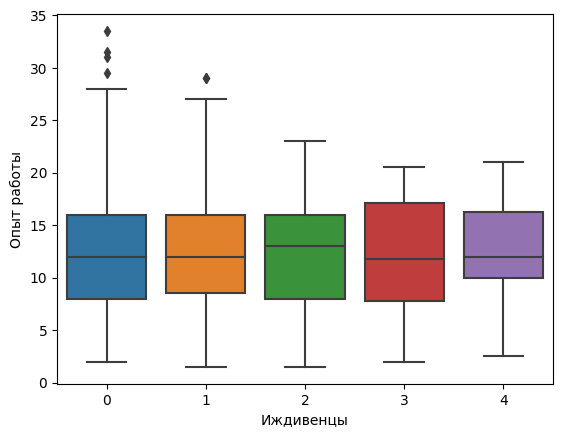

In [11]:
sns.boxplot(y="Опыт работы", x='Иждивенцы', data=df4);

Разбиваем на группы

In [12]:
groups = {}
for grp in df4['Иждивенцы'].unique():
    groups[grp] = df4['Опыт работы'][df4['Иждивенцы']==grp]
print(groups[4])

180    11.0
218    13.0
405    11.0
426    18.5
470     7.0
490     7.0
514    21.0
522    20.0
539    13.0
582    16.0
592    14.0
623     4.5
644    11.0
688    17.0
732    10.0
811    20.5
907    14.0
914     2.5
955    10.5
972    10.0
Name: Опыт работы, dtype: float64


In [ ]:
Применяем тест К-У

In [14]:
args = groups.values()
stats.kruskal(*args)

KruskalResult(statistic=0.3355168136319256, pvalue=0.9874075693119144)

Другой способ разбиения на группы и применение теста

In [ ]:
stats.kruskal(df4['Опыт работы'][df4.Иждивенцы==0],
              df4['Опыт работы'][df4.Иждивенцы==1],
              df4['Опыт работы'][df4.Иждивенцы==2],
              df4['Опыт работы'][df4.Иждивенцы==3],
              df4['Опыт работы'][df4.Иждивенцы==4])

KruskalResult(statistic=0.3355168136319256, pvalue=0.9874075693119144)

### Тест Колмогорова-Смирнова

In [ ]:
stats.ks_2samp(df4_1['Доход (тыс. руб.)'],df4_0['Доход (тыс. руб.)'])

Ks_2sampResult(statistic=0.5812887862606436, pvalue=1.0413648456367059e-73)

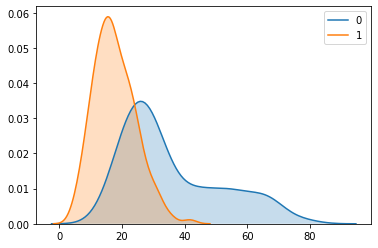

In [ ]:
sns.kdeplot(df4_1['Доход (тыс. руб.)'], label='0', shade=True)
sns.kdeplot(df4_0['Доход (тыс. руб.)'], label='1', shade=True)

<ipython-input-16-f49416f025ce>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df4['Опыт работы'][df4.Иждивенцы==3], label='0', shade=True)
<ipython-input-16-f49416f025ce>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df4['Опыт работы'][df4.Иждивенцы==4], label='1', shade=True)


<Axes: xlabel='Опыт работы', ylabel='Density'>

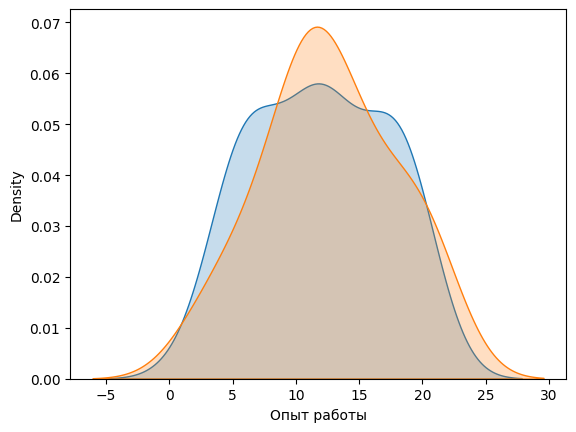

In [16]:
# sns.kdeplot(df4['Опыт работы'][df4.Иждивенцы==0], label='0', shade=True)
# sns.kdeplot(df4['Опыт работы'][df4.Иждивенцы==1], label='1', shade=True)
# sns.kdeplot(df4['Опыт работы'][df4.Иждивенцы==2], label='2', shade=True)
sns.kdeplot(df4['Опыт работы'][df4.Иждивенцы==3], label='0', shade=True)
sns.kdeplot(df4['Опыт работы'][df4.Иждивенцы==4], label='1', shade=True)


In [ ]:
stats.ks_2samp(groups[3],groups[4])

Ks_2sampResult(statistic=0.16363636363636364, pvalue=0.7903349400791406)

# 2. Количественная результирующая переменная, количественный фактор

## 2.1 Ковариация

Есть много путей посчитать ковариацию - первый, самый простой - это использовать функцию Pandas .cov()

In [ ]:
df4.mean()

Возраст                                              34.438438
Иждивенцы                                             1.040040
Доход (тыс. руб.)                                    26.599199
Опыт работы                                          12.325826
Срок проживания                                      13.482482
Стоимость недвижимости в собственности (тыс.дол.)    14.710711
Месячный платеж (тыс.руб.)                            4.066946
Благонадежный заемщик                                 0.492492
dtype: float64

In [ ]:
df4.cov()

,Возраст,Иждивенцы,Доход (тыс. руб.),Опыт работы,Срок проживания,Стоимость недвижимости в собственности (тыс.дол.),Месячный платеж (тыс.руб.),Благонадежный заемщик
Возраст,51.106176,-0.157853,6.487927,22.796381,12.937548,1.942594,0.004497,0.194678
Иждивенцы,-0.157853,0.904207,0.763960,-0.107248,-0.239779,-0.976381,0.003025,-0.115932
Доход (тыс. руб.),6.487927,0.763960,227.004889,-0.408657,4.214816,-1.388609,1.459950,4.518230
Опыт работы,22.796381,-0.107248,-0.408657,27.983160,8.843138,1.980124,0.381402,-0.002311
Срок проживания,12.937548,-0.239779,4.214816,8.843138,117.378200,10.086611,-0.410766,0.180981
Стоимость недвижимости в собственности (тыс.дол.),1.942594,-0.976381,-1.388609,1.980124,10.086611,378.634665,-0.422470,0.633598
Месячный платеж (тыс.руб.),0.004497,0.003025,1.459950,0.381402,-0.410766,-0.422470,2.789554,-0.163604
Благонадежный заемщик,0.194678,-0.115932,4.518230,-0.002311,0.180981,0.633598,-0.163604,0.250194


## 2.2 Корреляция

In [ ]:
#pandas
df4.corr()

,Возраст,Иждивенцы,Доход (тыс. руб.),Опыт работы,Срок проживания,Стоимость недвижимости в собственности (тыс.дол.),Месячный платеж (тыс.руб.),Благонадежный заемщик
Возраст,1.000000,-0.023221,0.060235,0.602811,0.167040,0.013965,0.000377,0.054443
Иждивенцы,-0.023221,1.000000,0.053324,-0.021321,-0.023275,-0.052769,0.001905,-0.243741
Доход (тыс. руб.),0.060235,0.053324,1.000000,-0.005127,0.025821,-0.004736,0.058017,0.599532
Опыт работы,0.602811,-0.021321,-0.005127,1.000000,0.154299,0.019237,0.043169,-0.000873
Срок проживания,0.167040,-0.023275,0.025821,0.154299,1.000000,0.047846,-0.022700,0.033396
Стоимость недвижимости в собственности (тыс.дол.),0.013965,-0.052769,-0.004736,0.019237,0.047846,1.000000,-0.012999,0.065098
Месячный платеж (тыс.руб.),0.000377,0.001905,0.058017,0.043169,-0.022700,-0.012999,1.000000,-0.195834
Благонадежный заемщик,0.054443,-0.243741,0.599532,-0.000873,0.033396,0.065098,-0.195834,1.000000


In [ ]:
#scipy
stats.pearsonr(df4['Возраст'], df4['Срок проживания'])

(0.1670404108392592, 1.0939555013541338e-07)

### 2.2.1. Корреляция для случаев аномалий в данных

Проверим данные на нормальность распределения

In [ ]:
stats.shapiro(df5['EDV'])

(0.9763701558113098, 0.5570949912071228)

In [ ]:
stats.shapiro(df5['EDD'])

(0.9876683950424194, 0.9347603917121887)

In [ ]:
stats.shapiro(df4.Возраст)

(0.9381666779518127, 5.965207817547331e-20)

In [ ]:
stats.shapiro(df4.Иждивенцы)

(0.8461812138557434, 4.850993223470574e-30)

In [ ]:
stats.shapiro(df4['Опыт работы'])

(0.9806652069091797, 2.990606096098247e-10)

В таких ситуациях прибегают к использованию

1) Коэффициент Кендалла (Кендалл-тау)

2) Коэффициент корреляции Спирмена



In [ ]:
#pandas
df4.corr(method='kendall')

,Возраст,Иждивенцы,Доход (тыс. руб.),Опыт работы,Срок проживания,Стоимость недвижимости в собственности (тыс.дол.),Месячный платеж (тыс.руб.),Благонадежный заемщик
Возраст,1.000000,0.014304,0.041797,0.506599,0.046978,0.012056,0.021821,0.016600
Иждивенцы,0.014304,1.000000,0.023537,0.001373,-0.010997,-0.045521,-0.006116,-0.221451
Доход (тыс. руб.),0.041797,0.023537,1.000000,0.000654,0.009794,0.004996,0.052501,0.549283
Опыт работы,0.506599,0.001373,0.000654,1.000000,0.054700,0.034283,0.035690,-0.010774
Срок проживания,0.046978,-0.010997,0.009794,0.054700,1.000000,0.021124,-0.005942,0.032036
Стоимость недвижимости в собственности (тыс.дол.),0.012056,-0.045521,0.004996,0.034283,0.021124,1.000000,-0.013450,0.075216
Месячный платеж (тыс.руб.),0.021821,-0.006116,0.052501,0.035690,-0.005942,-0.013450,1.000000,-0.159795
Благонадежный заемщик,0.016600,-0.221451,0.549283,-0.010774,0.032036,0.075216,-0.159795,1.000000


In [ ]:
#pandas
df4.corr(method='spearman')

,Возраст,Иждивенцы,Доход (тыс. руб.),Опыт работы,Срок проживания,Стоимость недвижимости в собственности (тыс.дол.),Месячный платеж (тыс.руб.),Благонадежный заемщик
Возраст,1.000000,0.017267,0.061571,0.602339,0.066133,0.014945,0.032063,0.019844
Иждивенцы,0.017267,1.000000,0.031083,0.000897,-0.014194,-0.054177,-0.007854,-0.238272
Доход (тыс. руб.),0.061571,0.031083,1.000000,0.000645,0.015210,0.005883,0.075991,0.666680
Опыт работы,0.602339,0.000897,0.000645,1.000000,0.078888,0.046366,0.052948,-0.012979
Срок проживания,0.066133,-0.014194,0.015210,0.078888,1.000000,0.028203,-0.008835,0.038387
Стоимость недвижимости в собственности (тыс.дол.),0.014945,-0.054177,0.005883,0.046366,0.028203,1.000000,-0.018180,0.083410
Месячный платеж (тыс.руб.),0.032063,-0.007854,0.075991,0.052948,-0.008835,-0.018180,1.000000,-0.194674
Благонадежный заемщик,0.019844,-0.238272,0.666680,-0.012979,0.038387,0.083410,-0.194674,1.000000


In [ ]:
stats.pearsonr(df4['Опыт работы'], df4['Возраст'])

(0.6028105373802893, 7.172625446880944e-100)

In [ ]:
stats.kendalltau(df4['Опыт работы'], df4['Возраст'])

KendalltauResult(correlation=0.5065990600369428, pvalue=1.762024507454865e-117)

In [ ]:
stats.spearmanr(df4['Опыт работы'], df4['Возраст'])

SpearmanrResult(correlation=0.602338501758171, pvalue=1.120436917793811e-99)

In [ ]:
stats.pearsonr(df4.Возраст, df4.Иждивенцы)

(-0.02322110753819314, 0.46347998813534635)

In [ ]:
stats.kendalltau(df4.Возраст, df4.Иждивенцы)

KendalltauResult(correlation=0.014303705432671772, pvalue=0.5611125565115909)

In [ ]:
stats.spearmanr(df4.Возраст, df4.Иждивенцы)

SpearmanrResult(correlation=0.017266805097111888, pvalue=0.5856788204283863)

In [ ]:
stats.pearsonr(df5.EDV, df5.EDD)

(0.958450934583227, 2.6648322867255437e-22)

In [ ]:
stats.kendalltau(df5.EDV, df5.EDD)

KendalltauResult(correlation=0.9369021018903522, pvalue=1.5551829296642397e-16)

In [ ]:
stats.spearmanr(df5.EDV, df5.EDD)

SpearmanrResult(correlation=0.9611187060328897, pvalue=7.729825851233704e-23)

Пример, когда корреляция Пирсона высокая и значимая в отличие от непараметрических тестов

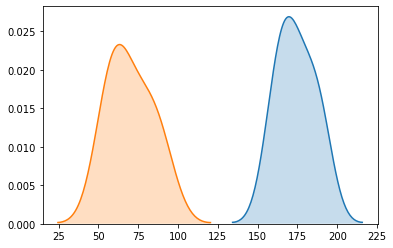

In [ ]:
sns.kdeplot([165,170,185,160,175,190], shade=True)
sns.kdeplot([55,60,90,62,72,82], shade=True)

In [ ]:
stats.shapiro([55,60,90,62,72,82])

(0.9328480958938599, 0.6022695302963257)

In [ ]:
stats.shapiro([165,170,185,160,175,190])

(0.9575421810150146, 0.8006121516227722)

In [ ]:
stats.pearsonr((165,170,185,160,175,190),(55,60,90,62,72,82))

(0.8840488532444281, 0.019387540289566834)

In [ ]:
stats.kendalltau((165,170,185,160,175,190),(55,60,90,62,72,82))

KendalltauResult(correlation=0.6, pvalue=0.1361111111111111)

In [ ]:
stats.spearmanr((165,170,185,160,175,190),(55,60,90,62,72,82))

SpearmanrResult(correlation=0.7714285714285715, pvalue=0.07239650145772594)

## 3 Качественная результирующая переменная и качественный фактор.


### 3.1 Матрица сопряженности

In [ ]:
df6=pd.read_excel('HIV.xlsx')
df6.head()

,resistence,gender,viruslload,IL_2,IL_6,IL_16,IL_23,FNOa
0,1,m,10342,1.16,13.62,33.31,2.48,51.68
1,1,f,10285,1.23,13.60,32.04,2.62,52.62
2,1,f,12673,1.34,13.31,30.72,2.52,50.63
3,1,m,7205,1.56,12.12,28.23,2.84,43.12
4,1,m,5064,2.12,11.82,26.04,3.38,42.64


In [ ]:
tab= pd.crosstab(df6['resistence'], df6['gender'])
tab

gender,f,m
resistence,,
0,10,12
1,16,15


In [17]:
pd.crosstab( df6['gender'],df6['resistence'])

NameError: ignored

### 3.2 Тест Хи-квадрат

In [ ]:
stats.chi2_contingency(tab)

(0.026596089096089143,
 0.8704530262006571,
 1,
 array([[10.79245283, 11.20754717],
        [15.20754717, 15.79245283]]))

In [18]:
tab1=pd.crosstab(df4['Иждивенцы'], df4['Благонадежный заемщик'])
tab1

Благонадежный заемщик,0,1
Иждивенцы,,
0,122,206
1,195,192
2,139,81
3,34,10
4,17,3


In [19]:
res = stats.chi2_contingency(pd.crosstab(df4['Иждивенцы'], df4['Благонадежный заемщик']))
res.pvalue

3.6849986464421974e-12

### 3.3 Тест Фишера

In [ ]:
stats.fisher_exact(tab)

(0.78125, 0.782211333289258)

In [ ]:
oddsratio, pvalue = stats.fisher_exact(tab)
print(oddsratio, pvalue)

0.78125 0.782211333289258


 ## 4. Множественные сравнения

### 4.1 Тест Тьюки

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=df4['Доход (тыс. руб.)'],
groups=df4['Иждивенцы'], alpha= 0.05 )
print(tukey)


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     0      1    0.485    0.9   -2.606  3.5759  False
     0      2   1.9587 0.5591  -1.6303  5.5477  False
     0      3   3.1787 0.6599  -3.4333  9.7908  False
     0      4   1.3878    0.9  -8.0978 10.8734  False
     1      2   1.4738 0.7481  -2.0037  4.9512  False
     1      3   2.6938 0.7677  -3.8584  9.2459  False
     1      4   0.9028    0.9  -8.5411 10.3468  False
     2      3     1.22    0.9  -5.5813  8.0213  False
     2      4  -0.5709    0.9 -10.1894  9.0476  False
     3      4  -1.7909    0.9 -12.8974  9.3156  False
-----------------------------------------------------


group1,group2,meandiff,p-adj,lower,upper,reject
0,1,3.8404,0.0832,-0.2945,7.9753,False
0,2,10.3493,0.001,4.9434,15.7553,True
0,3,18.7656,0.0013,5.4182,32.1131,True
0,4,37.0456,0.001,13.0747,61.0166,True
1,2,6.5089,0.0103,1.0476,11.9702,True
1,3,14.9252,0.0199,1.5552,28.2952,True
1,4,33.2052,0.0016,9.2217,57.1887,True
2,3,8.4163,0.4563,-5.3998,22.2324,False
2,4,26.6963,0.0225,2.4613,50.9313,True
3,4,18.28,0.3495,-8.8542,45.4142,False


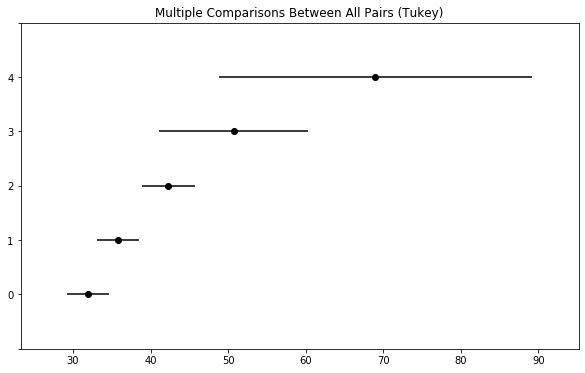

In [ ]:
tukey1 = pairwise_tukeyhsd(endog=df4_1['Доход (тыс. руб.)'],# Данные
groups=df4_1['Иждивенцы'], # Группы
alpha= 0.05 )# Уровень значимости
tukey1.plot_simultaneous()    # доверительные интервалы
tukey1.summary()              # результат
